### Implement Logistic Regression

First, let's generate a synthetic dataset for binary classification using `sklearn.datasets.make_classification`.

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=42)

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nTraining set size:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("\nTesting set size:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Shape of X (features): (1000, 2)
Shape of y (target): (1000,)

Training set size:
X_train shape: (700, 2)
y_train shape: (700,)

Testing set size:
X_test shape: (300, 2)
y_test shape: (300,)


Now, let's train a Logistic Regression model on the training data.

In [2]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")
print("Model coefficients (weights):", model.coef_)
print("Model intercept (bias):", model.intercept_)

Logistic Regression model trained successfully.
Model coefficients (weights): [[-0.72336264  3.54855707]]
Model intercept (bias): [1.52995113]


Finally, let's evaluate the model's performance on the test data using various metrics.

Accuracy: 0.8833
Precision: 0.9275
Recall: 0.8366
F1-Score: 0.8797

Confusion Matrix:
[[137  10]
 [ 25 128]]


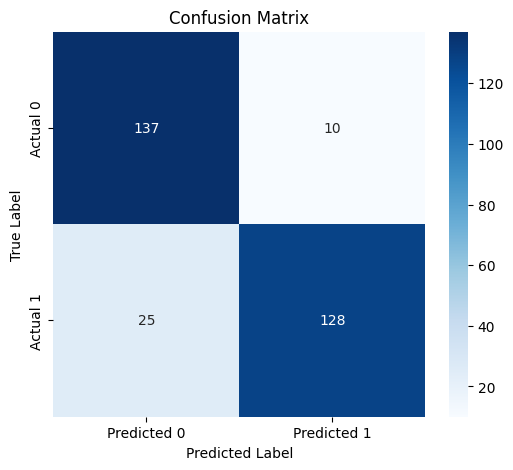

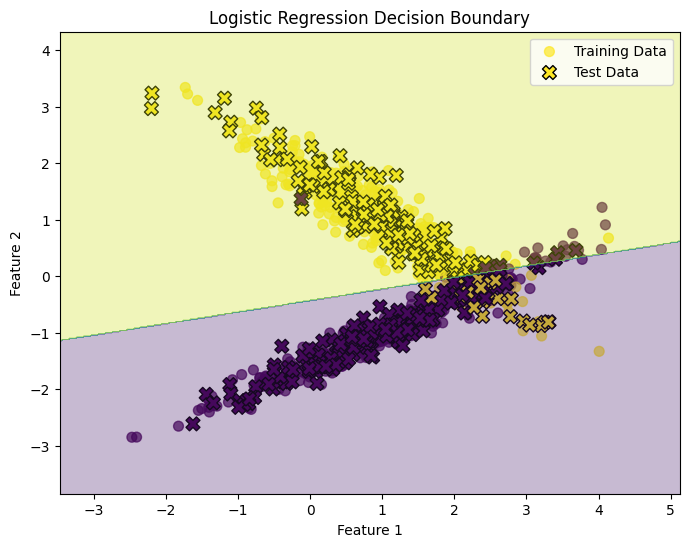

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Visualize the decision boundary (for 2D data)
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Plot the training points
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='viridis', alpha=0.7, label='Training Data')

# Plot the test points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, marker='X', cmap='viridis', edgecolors='k', label='Test Data')

# Create a meshgrid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()